<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/EunjuKang/project_04/230120_commit_Project04_%EB%91%90%ED%94%BC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project04.두피 데이터 분석 시스템

주어진 데이터가 어떻게 구성되어 있고 어느 부분을 어떻게 활용할지 생각해봐야함 


AI Hub에서 다운로드 받은 데이터

1. Validation set: 원천데이터와 라벨링데이터

  미세각질 피지과다 모낭사이홍반 모낭홍반농포 비듬 탈모 6종류가 0-3로 분류되어 있음

2. Meta data: 각 사람에 대한 정보

데이터 구조 정리

Meta Data 디렉토리 안에는 

  0013_A2LEBJJDE00060O_1602578303771_2_TH_META.json -> 5개

  0013_A2LEBJJDE00060O_1602578303771_3_TH

  0013_A2LEBJJDE00060O_1602578303771_4_LH

  0013_A2LEBJJDE00060O_1602578303771_5_RH

  0013_A2LEBJJDE00060O_1602578303771_6_BH

위와 같이 한 사람에 대해 json 파일이 다섯개 있으며 

'0013_A2LEBJJDE00060O_1602578303771_' 가 사람마다의 고유한 값




한 증상에 대해 양호인 경우는 다른 증상들에 대해서도 양호를 보이는 경우가 많음 -> 이를 그래프로 시각화하여 서로 연관성을 확인해보고자 함

펌, 염색 여부에 따른 증상 분포 시각화

각 증상에 대한 중증도 0~3을 모두 분류하기보단 0(양호): 없음 / 1-3(경증, 중등도,중증) : 있음으로 분류 -> sigmoid 함수를 통해 나오는 확률값으로 결과를 예측하고자 함 
ex. 0.78, 0.22 -> 탈모가 있을 확률이 22% 입니다. 

모델링 목표: 새로운 사진이 입력되면 증상별로 위험도를 예측하고 사람이 성별 및 나이, 추천을 원하는지 여부를 파악하여 제품 추천

- 추가 검색이 필요한 정보들 

  남성/여성별 발병률이 높은 증상

  연령대에 따른 증상의 발병률

  펌, 염색 여부에 따른 분류 (펌, 염색은 모발 손상에 큰 영향)

  각 증상 완화에 도움이 되는 제품 조사


01/18 기준 모델링 목표 수정

Meta Data가 너무 커서 기간 안에 추천하는 모델까지 만드는 것은 불가능 ->
우선 이미지를 보면 증상을 잘 예측하는 모델 형성을 먼저 완료하기로 함

## 1. 데이터 확인 및 분석

### 데이터 불러오기

#### 원천 데이터

glob 로 파일명 리스트로 받아오려고 했는데 .zip 형식 파일 경로는 !unzip 명령어에서 에러 발생 -> 직접 코드로 풀기

In [63]:
"""
!mkdir /content/scalp_data/img_zip_dir # zip 파일 저장할 디렉토리

%cd /content/scalp_data/img_zip_dir 
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_1_img.Zip'

%cd /content/scalp_data/img_data # 이미지 저장할 디렉토리
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_2_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_3_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭사이홍반_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_4_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]모낭홍반농포_3.중증.zip'


%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_5_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]비듬_3.중증.zip'

%cd /content/scalp_data/img_zip_dir
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_6_img.Zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_0.양호.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_1.경증.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_2.중등도.zip'

%cd /content/scalp_data/img_data
!unzip -qq '/content/scalp_data/img_zip_dir/[원천]탈모_3.중증.zip'
"""

"\n!mkdir /content/scalp_data/img_zip_dir # zip 파일 저장할 디렉토리\n\n%cd /content/scalp_data/img_zip_dir \n!unzip -qq '/content/drive/MyDrive/04_Scalp/value_1_img.Zip'\n\n%cd /content/scalp_data/img_data # 이미지 저장할 디렉토리\n!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_0.양호.zip'\n\n%cd /content/scalp_data/img_data\n!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_1.경증.zip'\n\n%cd /content/scalp_data/img_data\n!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_2.중등도.zip'\n\n%cd /content/scalp_data/img_data\n!unzip -qq '/content/scalp_data/img_zip_dir/[원천]미세각질_3.중증.zip'\n\n%cd /content/scalp_data/img_zip_dir\n!unzip -qq '/content/drive/MyDrive/04_Scalp/value_2_img.Zip'\n\n%cd /content/scalp_data/img_data\n!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_0.양호.zip'\n\n%cd /content/scalp_data/img_data\n!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_1.경증.zip'\n\n%cd /content/scalp_data/img_data\n!unzip -qq '/content/scalp_data/img_zip_dir/[원천]피지과다_2.중등도.zip'\n\n%cd /content/scal

In [64]:
!mkdir /content/scalp_data

In [65]:
!mkdir /content/scalp_data/img_zip_dir # zip 파일 저장할 디렉토리

In [66]:
!mkdir /content/scalp_data/img_data # 이미지 파일 저장할 디렉토리

In [67]:
%cd /content/scalp_data/img_zip_dir 

!unzip -qq '/content/drive/MyDrive/04_Scalp/value_4_img.Zip'
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_5_img.Zip'
!unzip -qq '/content/drive/MyDrive/04_Scalp/value_6_img.Zip'

/content/scalp_data/img_zip_dir
unzip:  cannot find or open /content/drive/MyDrive/04_Scalp/value_4_img.Zip, /content/drive/MyDrive/04_Scalp/value_4_img.Zip.zip or /content/drive/MyDrive/04_Scalp/value_4_img.Zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/04_Scalp/value_5_img.Zip, /content/drive/MyDrive/04_Scalp/value_5_img.Zip.zip or /content/drive/MyDrive/04_Scalp/value_5_img.Zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/04_Scalp/value_6_img.Zip, /content/drive/MyDrive/04_Scalp/value_6_img.Zip.zip or /content/drive/MyDrive/04_Scalp/value_6_img.Zip.ZIP.


In [68]:
# 디렉토리 삭제하는 코드 
"""
import os
import shutil

dir_path = '/content/scalp_data/img_zip_dir'

if os.path.exists(dir_path):
    shutil.rmtree(dir_path)
"""

"\nimport os\nimport shutil\n\ndir_path = '/content/scalp_data/img_zip_dir'\n\nif os.path.exists(dir_path):\n    shutil.rmtree(dir_path)\n"

In [69]:
import glob 
import zipfile 

img_path = '/content/scalp_data/img_zip_dir'
img_path_list = glob.glob(img_path+'/*')


In [71]:
for img_path in img_path_list:
  img_zip =  zipfile.ZipFile(img_path)
  img_zip.extractall('/content/scalp_data/img_data')
  img_zip.close()

In [72]:
# 총 23568 개의 이미지

import os

file_list = os.listdir('/content/scalp_data/img_data')
print(len(file_list))

0


In [73]:
file_list.sort()

#### 라벨링 데이터

파이썬 zipfile 모듈 이용하면 훨씬 간단하게 불러올 수 있음

In [ ]:
!mkdir /content/scalp_data/label_data

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
import glob 
import zipfile 

path = '/content/drive/MyDrive/04_Scalp/label_zip'
path_list = glob.glob(path+'/*')

print(path_list)

['/content/drive/MyDrive/04_Scalp/label_zip/[라벨]피지과다_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]비듬_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]탈모_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]탈모_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]비듬_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]피지과다_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_0.양호.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭홍반농포_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_2.중등도.zip', 

In [ ]:
for json_path in path_list:
  json_zip = zipfile.ZipFile(json_path)
  json_zip.extractall('/content/scalp_data/label_data')
  json_zip.close()

In [ ]:
# json 파일 총 23568개 : 이미지랑 개수 동일

json_list = os.listdir('/content/scalp_data/label_data')
print(len(json_list))

23568


In [ ]:
json_list.sort()

#### 원천 vs 라벨링 데이터 비교

23568/5 -> 나누어 떨어지지 않으므로 모든 개인이 5개의 파일을 가지고 있진 않음

In [ ]:
# 이미지 파일 : file_list
# 라벨링 파일 : json_list

print(file_list[0][:-8])
print(json_list[0][:-9])

2278_A2LEBJJDE00181Z_1606655779534_
8297_A2LEBJJDE001076_1607596628119_


In [ ]:
# 이미지 이름에서 얻는 개인의 id 목록

id_list = []

def get_person_id_from_img_name (file_name):
  id = file_name[:-8]
  id_list.append(id)

In [ ]:
for img_name in file_list:
  get_person_id_from_img_name(img_name)

print(len(id_list))

23568


In [ ]:
id_set_list = list(set(id_list))

print(len(id_set_list)) # 고유 id 값이 6580개

6580


In [ ]:
id_set_list.sort()

In [ ]:
# 라벨링 이름에서 얻는 개인의 id 목록

json_id_list = []

def get_person_id_from_json_name (file_name):
  id = file_name[:-9]
  json_id_list.append(id)

In [ ]:
for json_name in json_list:
  get_person_id_from_json_name(json_name)

In [ ]:
print(len(json_id_list))

23568


In [ ]:
json_id_set_list = list(set(json_id_list))
json_id_list.sort()

In [ ]:
print(len(json_id_set_list))

6580


확인결과 총 3928명이 아닌 6580명 이었음


In [ ]:
# id_set_list vs json_id_set_list 비교

for name in id_set_list:
  if name in json_id_set_list:
    pass
  else:
    print(name)

확인결과 서로 다른 사람이 있지는 않음 -> 모든 사람이 5개의 파일을 가지고 있지는 않음 (validation 데이터만 사용해서 그런듯 함)

In [ ]:
file_list[:10]

['0013_A2LEBJJDE00060O_1605839548962_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605943763600_3_TH.jpg',
 '0013_A2LEBJJDE00060O_1605943787774_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605943787774_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1605949144786_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605949144786_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1605949385518_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1605949385518_6_BH.jpg',
 '0013_A2LEBJJDE00060O_1606386139601_2_TH.jpg',
 '0013_A2LEBJJDE00060O_1606386139601_3_TH.jpg']

In [ ]:
json_list[:10]

['0013_A2LEBJJDE00060O_1605839548962_2_TH.json',
 '0013_A2LEBJJDE00060O_1605943763600_3_TH.json',
 '0013_A2LEBJJDE00060O_1605943787774_2_TH.json',
 '0013_A2LEBJJDE00060O_1605943787774_6_BH.json',
 '0013_A2LEBJJDE00060O_1605949144786_2_TH.json',
 '0013_A2LEBJJDE00060O_1605949144786_6_BH.json',
 '0013_A2LEBJJDE00060O_1605949385518_2_TH.json',
 '0013_A2LEBJJDE00060O_1605949385518_6_BH.json',
 '0013_A2LEBJJDE00060O_1606386139601_2_TH.json',
 '0013_A2LEBJJDE00060O_1606386139601_3_TH.json']

## 2. 데이터 전처리

모델링 목표: 이미지를 입력하면 예측해서 여섯가지 증상에 대해 각자의 여부를 출력하는 모델

output layer는 dense: 6, activation func: sigmoid 를 사용 -> [0.01, 0.78, 0.98, 0.89, 0.02, 0.22] 

-> 미세각질 없음, 피지과다 78%, 모낭사이홍반 98%, 모낭홍반/농포 89%, 비듬 2%, 탈모 22%


이 데이터와 Meta 데이터 + 추가로 상품조사를 따로 하면 제품 추천까지 할 수 있음

각 이미지의 RGB 값: x_train

json 에서 해당 증상에 대한 : y_train

+ 이미지 파일 이름을 전달하면 해당 라벨링 파일 불러와서 dataset 형성

In [ ]:
# 이미지 이름: file_list
# json 이름: json_list

In [ ]:
# 파일 이름을 .jpg -> .json 으로 변환하는 함수

def img_name_to_json_name(img_name):
  file_name = img_name[:-4]
  file_name = file_name + '.json'
  return (file_name)

In [ ]:
# .json data를 전달하면 각 증상별 유뮤를 리스트로 반환하는 함수 ex. [0,1,0,1,0,0]

# 증상이 0이면 0, 1~3이면 1

def binary_div(value):
  if int(value) == 0:
    return 0
  else:
    return 1

# [0,1,0,0,1,0] 같은 6차원 리스트 반환

def value_list_from_json(json_data):
  value_list = []
  value_list.append(binary_div(json_data['value_1']))
  value_list.append(binary_div(json_data['value_2']))
  value_list.append(binary_div(json_data['value_3']))
  value_list.append(binary_div(json_data['value_4']))
  value_list.append(binary_div(json_data['value_5']))
  value_list.append(binary_div(json_data['value_6']))
  return value_list

#### dataset 형성

In [ ]:
# dataset 만들기

import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import json

x_data = []
y_data = []

img_dir_path = '/content/scalp_data/img_data'
# img_path: img_dir_path + '/' + img_name
# /content/scalp_data/img_data/0013_A2LEBJJDE00060O_1605839548962_2_TH.jpg

json_dir_path = '/content/scalp_data/label_data'
# json_path : json_dir_path + '/' + img_name_to_json_name(img_name)
# /content/scalp_data/label_data/0013_A2LEBJJDE00060O_1605839548962_2_TH.json

for img_name in file_list:
  img_path = img_dir_path + '/' + img_name
  img = PIL.Image.open(img_path)
  #plt.imshow(img)
  #plt.show()
  img = img.convert('RGB')
  img = img.resize((75,75))
  np_img = np.array(img)
  np_img = np_img / 255.0
  x_data.append(np_img)

  # json에서 증상별 리스트 가져오기
  label_list = []
  json_path = json_dir_path + '/' + img_name_to_json_name(img_name)
  with open(json_path, 'r') as file:
    data = json.load(file)
    label_list = value_list_from_json(data)
    label_list = np.array(label_list)
    y_data.append(label_list)

In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
x_data.shape

(23568, 75, 75, 3)

In [ ]:
y_data.shape

(23568, 6)

Data augmentation: 이미 데이터가 너무 많아서 augmentation은 하지 않기로 함

매 런타임마다 데이터 전처리를 하지 않도록 전처리한 이미지와 라벨링 numpy 배열을 저장

In [ ]:
np.save('/content/drive/MyDrive/04_Scalp/data_to_numpy/x_data.npy', x_data)

In [ ]:
np.save('/content/drive/MyDrive/04_Scalp/data_to_numpy/y_data.npy', y_data)

## 3. 학습 및 성능 확인 

### Model1. Mnist 모델 이용

+ 1번째 시도

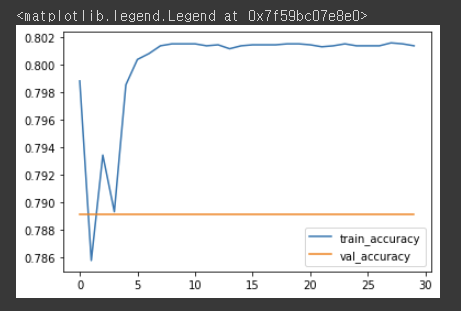

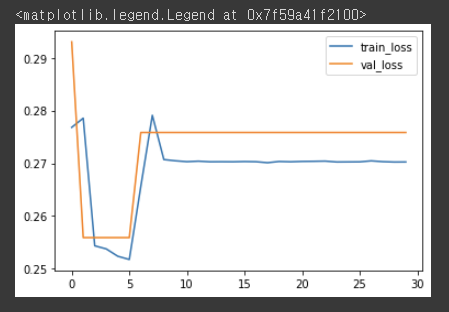

accuracy & loss 가 일정하게 나오는 것을 보니 metric과 loss가 잘못 설정되었다고 추측

-> metric은 accuracy가 아닌 mae 로, loss 는 sprase_categorical_crossentropy가 아닌 mse로 수정 + train, val, test도 6:2:2가 아닌 8:2로 분할 

+ 2번째 시도

In [ ]:
# 저장해둔 numpy 배열 불러오기

import numpy as np

x_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/x_data.npy')
y_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/y_data.npy')

In [ ]:
# train/test 8:2 나누기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

x_val = x_test[:2]
x_test = x_test[2:]

y_val = y_test[:2]
y_test = y_test[2:]

In [ ]:
from sklearn.metrics import mean_absolute_error

cnn_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
history = cnn_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 30)

Epoch 1/30
629/629 [==============================] - 35s 41ms/step - loss: 0.1631 - mae: 0.3170 - val_loss: 0.1504 - val_mae: 0.3067
Epoch 2/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1510 - mae: 0.2953 - val_loss: 0.1459 - val_mae: 0.3057
Epoch 3/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1465 - mae: 0.2875 - val_loss: 0.1429 - val_mae: 0.2910
Epoch 4/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1439 - mae: 0.2818 - val_loss: 0.1454 - val_mae: 0.2924
Epoch 5/30
629/629 [==============================] - 25s 41ms/step - loss: 0.1414 - mae: 0.2778 - val_loss: 0.1401 - val_mae: 0.2731
Epoch 6/30
629/629 [==============================] - 25s 40ms/step - loss: 0.1401 - mae: 0.2752 - val_loss: 0.1468 - val_mae: 0.2857
Epoch 7/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1364 - mae: 0.2677 - val_loss: 0.1412 - val_mae: 0.2656
Epoch 8/30
629/629 [==============================] - 25s 40ms

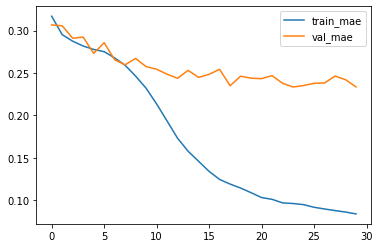

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

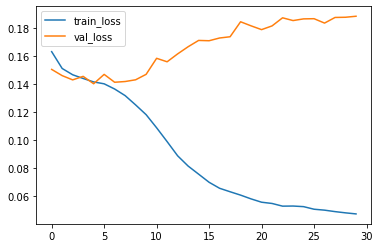

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

+ 3번째 시도 - 8:2 가 아닌 6:2:2로 분할

In [ ]:
# 저장해둔 numpy 배열 불러오기

import numpy as np

x_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/x_data.npy')
y_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/y_data.npy')

In [ ]:
# train/val/test 나누기 6:2:2 로 분할

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.4)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def create_cnn_model ():
  model = tf.keras.models.Sequential() # 객체 생성 
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu', input_shape = (75, 75, 3))) # 필터 개수 = 64개, 필터 크기 = 3*3
  model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 1, padding = 'same'))
  # output_shape = (28,28,64)
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')) # 필터 개수 = 64개, 필터 크기 = 3*3
  model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 1, padding = 'same'))
  # output_shape = (28,28,64)
  model.add(tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')) # 필터 개수 = 64개, 필터 크기 = 3*3
  model.add(tf.keras.layers.MaxPooling2D((2,2), strides = 1, padding = 'same'))
  # output_shape = (28,28,1)
  model.add(tf.keras.layers.Flatten()) #flatten : 28 * 28 2차원 데이터를 일렬로 나열하는 것
  model.add(tf.keras.layers.Dense(64, activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2)) # droupout: 너무 특정 feature에만 집중하지 않도록 설정한 부분의 weight 값을 잠시 무시하는 것
  model.add(tf.keras.layers.Dense(6, activation = 'sigmoid')) 
  return model


In [ ]:
cnn_model = create_cnn_model()

In [ ]:
from sklearn.metrics import mean_absolute_error

cnn_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
history = cnn_model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30, batch_size = 30)

Epoch 1/30
472/472 [==============================] - 29s 43ms/step - loss: 0.1701 - mae: 0.3271 - val_loss: 0.1525 - val_mae: 0.3020
Epoch 2/30
472/472 [==============================] - 19s 41ms/step - loss: 0.1555 - mae: 0.3042 - val_loss: 0.1480 - val_mae: 0.3010
Epoch 3/30
472/472 [==============================] - 20s 43ms/step - loss: 0.1520 - mae: 0.2970 - val_loss: 0.1447 - val_mae: 0.2944
Epoch 4/30
472/472 [==============================] - 19s 41ms/step - loss: 0.1480 - mae: 0.2893 - val_loss: 0.1425 - val_mae: 0.2851
Epoch 5/30
472/472 [==============================] - 20s 42ms/step - loss: 0.1443 - mae: 0.2826 - val_loss: 0.1446 - val_mae: 0.2753
Epoch 6/30
472/472 [==============================] - 20s 43ms/step - loss: 0.1417 - mae: 0.2778 - val_loss: 0.1478 - val_mae: 0.2961
Epoch 7/30
472/472 [==============================] - 19s 41ms/step - loss: 0.1392 - mae: 0.2728 - val_loss: 0.1502 - val_mae: 0.2820
Epoch 8/30
472/472 [==============================] - 19s 41ms

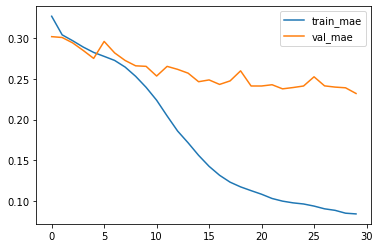

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

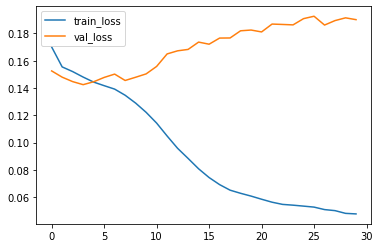

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

테스트 케이스 예측

In [ ]:
test_x = np.expand_dims(x_test[0], axis = 0)

In [ ]:
result = cnn_model.predict(test_x)

1/1 [==============================] - 0s 165ms/step


In [ ]:
print(result)

[[1.5265205e-07 9.9999988e-01 9.7365046e-01 9.2365519e-07 2.3832865e-02
  2.1515000e-06]]


In [ ]:
print(y_test[0])

[0 1 1 0 0 0]


[[1.5265205e-07 9.9999988e-01 9.7365046e-01 9.2365519e-07 2.3832865e-02
  2.1515000e-06]] 

  -> 0% 99% 97% 2% 0% 0% vs [0 1 1 0 0 0]

꽤 잘 예측해낸 것으로 생각됨

### Model2. Mnist 모델 + early stopping

overfitting을 막기 위해 early stopping을 도입해봄

In [ ]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping()

In [ ]:
cnn_model = create_cnn_model()

In [ ]:
cnn_model.compile(optimizer='adam', loss = 'mse', metrics = ['mae'])
history = cnn_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 30, callbacks = [early_stopping])

Epoch 1/30
629/629 [==============================] - 34s 42ms/step - loss: 0.2188 - mae: 0.2959 - val_loss: 0.1594 - val_mae: 0.3074
Epoch 2/30
629/629 [==============================] - 26s 41ms/step - loss: 0.1585 - mae: 0.3099 - val_loss: 0.1515 - val_mae: 0.2998


학습 에포크가 2번하고 종료

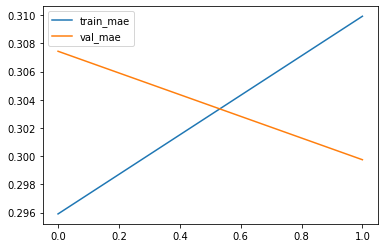

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

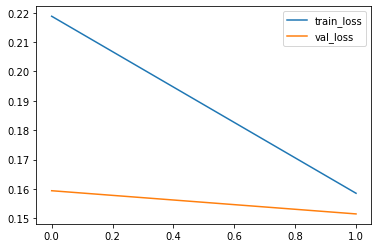

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

테스트 케이스 예측

In [ ]:
val_x = np.expand_dims(x_val[0], axis = 0)

In [ ]:
result = cnn_model.predict(val_x)

1/1 [==============================] - 0s 148ms/step


In [ ]:
print(result)

[[0.14363179 0.822696   0.93416965 0.0069321  0.3507987  0.5323654 ]]


In [ ]:
print(y_val[0])

[0 1 1 1 0 0]


[ 0.14363179 0.822696   0.93416965 0.0069321  0.3507987  0.5323654 ] 

-> 14% 82% 93% 0% 35% 53%  vs [0 1 1 1 0 0]

early stopping을 하지 않은 모델이 더 높은 적중률을 보임 -> early stopping을 도입하는건 좋지 않은 방법이라 생각됨

### Model3. EfficientNet을 이용한 Fine-tuning

In [ ]:
# 다른 코랩 파일 (Project04.두피_데이터_분석_시스템_2nd)

### Model4. InceptionV3 를 이용한 Fine-tuning

+ 1st 시도. 8:2 데이터셋 분할, 50% freeze

In [ ]:
import numpy as np

x_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/x_data.npy')
y_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/y_data.npy')

In [ ]:
x_data.shape

(23568, 75, 75, 3)

In [ ]:
# train/test 8:2 나누기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

x_val = x_test[:2]
x_test = x_test[2:]

y_val = y_test[:2]
y_test = y_test[2:]

In [ ]:
from tensorflow.keras import applications

# finetunning을 위한 pretrained 모델 불러오기
base_model = applications.inception_v3.InceptionV3(include_top=False, weights = 'imagenet', input_shape =(75, 75, 3))

base_model.trainable = False

# base_model.summary()


87910968/87910968 [==============================] - 6s 0us/step


In [ ]:
base_model.input

<KerasTensor: shape=(None, 75, 75, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
base_model.output

<KerasTensor: shape=(None, 1, 1, 2048) dtype=float32 (created by layer 'mixed10')>

In [ ]:
len(base_model.layers)

311

In [ ]:
for layer in base_model.layers[:155]:
  layer.trainable = True

# top <- false 이기 때문에 concatenate까지 하고 모델은 종료, flatten 부터 해야함
from tensorflow.keras import layers

flat_layer = layers.Flatten()(base_model.output)
output = layers.Dense(6, activation = 'sigmoid')(flat_layer)

import tensorflow as tf
model = tf.keras.models.Model(base_model.input, output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

In [ ]:
custom_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

#fine tuning fit 

model.compile(optimizer=custom_adam, loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 30)

Epoch 1/30
629/629 [==============================] - 47s 52ms/step - loss: 0.1513 - mae: 0.2932 - val_loss: 0.1308 - val_mae: 0.2497
Epoch 2/30
629/629 [==============================] - 29s 46ms/step - loss: 0.1213 - mae: 0.2371 - val_loss: 0.1250 - val_mae: 0.2484
Epoch 3/30
629/629 [==============================] - 28s 44ms/step - loss: 0.1077 - mae: 0.2148 - val_loss: 0.1235 - val_mae: 0.2384
Epoch 4/30
629/629 [==============================] - 28s 44ms/step - loss: 0.0947 - mae: 0.1917 - val_loss: 0.1243 - val_mae: 0.2252
Epoch 5/30
629/629 [==============================] - 28s 44ms/step - loss: 0.0807 - mae: 0.1659 - val_loss: 0.1274 - val_mae: 0.2050
Epoch 6/30
629/629 [==============================] - 28s 44ms/step - loss: 0.0674 - mae: 0.1409 - val_loss: 0.1350 - val_mae: 0.2182
Epoch 7/30
629/629 [==============================] - 28s 45ms/step - loss: 0.0545 - mae: 0.1163 - val_loss: 0.1399 - val_mae: 0.2171
Epoch 8/30
629/629 [==============================] - 29s 46ms

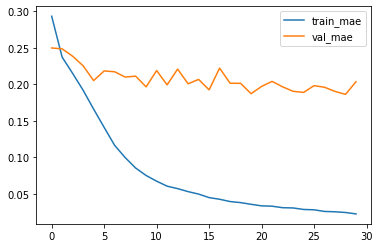

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

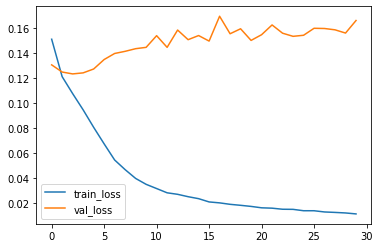

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

테스트 케이스 예측

In [ ]:
val_x_1 = np.expand_dims(x_val[0], axis = 0)

In [ ]:
result = model.predict(val_x_1)

1/1 [==============================] - 2s 2s/step


In [ ]:
np.set_printoptions(precision=6, suppress=True)

In [ ]:
print(result)

[[0.000055 0.999922 0.000027 0.000016 0.999736 0.      ]]


In [ ]:
result = np.array(result)
pos_1 = result * 100

In [ ]:
print(pos_1)

[[ 0.005529 99.99222   0.002702  0.001585 99.97365   0.000004]]


In [ ]:
print(y_val[0])

[0 1 0 0 1 0]


0.005529 99.99222   0.002702  0.001585 99.97365   0.000004 

-> 0% 100% 0% 0% 100% 0% 

가장 높은 적중률을 보여줌

두번째 테스트 케이스

In [ ]:
val_x_2 = np.expand_dims(x_val[1], axis = 0)

In [ ]:
result2 = model.predict(val_x_2)

1/1 [==============================] - 0s 27ms/step


In [ ]:
print(result2)

[[0.11155  0.695053 0.014996 0.995012 0.000018 0.221619]]


In [ ]:
print(y_val[1])

[0 1 1 1 1 0]


5번째 지표에 대해 맞추지 못함 : Efficient Net과 동일하게 비듬에 대한 적중률이 낮음 

모델 저장으로 가중치와 학습 데이터 저장

In [ ]:
model.save('/content/drive/MyDrive/04_Scalp/model_save_inception_1')

+ 2nd. 100% 동결로 전이학습 -> 50% 동결로 한번 더 학습

In [ ]:
from tensorflow.keras import applications

# finetunning을 위한 pretrained 모델 불러오기
base_model = applications.inception_v3.InceptionV3(include_top=False, weights = 'imagenet', input_shape =(75, 75, 3))

base_model.trainable = False

# base_model.summary()

# top <- false 이기 때문에 concatenate까지 하고 모델은 종료, flatten 부터 해야함
from tensorflow.keras import layers

flat_layer = layers.Flatten()(base_model.output)
output = layers.Dense(6, activation = 'sigmoid')(flat_layer)

import tensorflow as tf
model = tf.keras.models.Model(base_model.input, output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

In [ ]:
import numpy as np

x_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/x_data.npy')
y_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/y_data.npy')

# train/test 8:2 나누기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

x_val = x_test[:2]
x_test = x_test[2:]

y_val = y_test[:2]
y_test = y_test[2:]


In [ ]:
custom_adam = tf.keras.optimizers.Adam(learning_rate=0.01)

#fine tuning fit 

model.compile(optimizer=custom_adam, loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 30)

Epoch 1/30
629/629 [==============================] - 30s 27ms/step - loss: 0.1934 - mae: 0.2431 - val_loss: 0.1883 - val_mae: 0.2316
Epoch 2/30
629/629 [==============================] - 15s 23ms/step - loss: 0.1882 - mae: 0.2315 - val_loss: 0.1929 - val_mae: 0.2370
Epoch 3/30
629/629 [==============================] - 13s 21ms/step - loss: 0.1878 - mae: 0.2268 - val_loss: 0.1939 - val_mae: 0.2321
Epoch 4/30
629/629 [==============================] - 13s 21ms/step - loss: 0.1871 - mae: 0.2234 - val_loss: 0.1926 - val_mae: 0.2256
Epoch 5/30
629/629 [==============================] - 13s 21ms/step - loss: 0.1859 - mae: 0.2200 - val_loss: 0.1988 - val_mae: 0.2304
Epoch 6/30
629/629 [==============================] - 15s 24ms/step - loss: 0.1845 - mae: 0.2173 - val_loss: 0.1998 - val_mae: 0.2294
Epoch 7/30
629/629 [==============================] - 13s 21ms/step - loss: 0.1843 - mae: 0.2148 - val_loss: 0.1988 - val_mae: 0.2320
Epoch 8/30
629/629 [==============================] - 14s 22ms

In [ ]:
model.save('/content/drive/MyDrive/04_Scalp/model_save_inception_2-1')

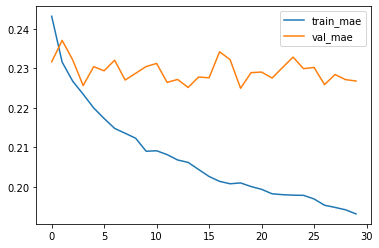

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

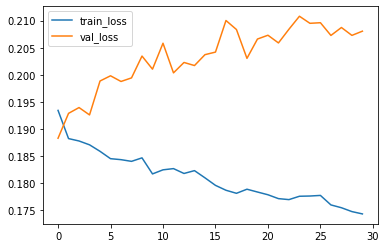

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

In [ ]:
np.set_printoptions(precision=6, suppress=True)

val_x_2 = np.expand_dims(x_val[1], axis = 0)
result3 = model.predict(val_x_2)
print(result3)

1/1 [==============================] - 2s 2s/step
[[0.       1.       0.992888 0.       0.999962 0.000005]]


In [ ]:
print(result3)

[[0.       1.       0.992888 0.       0.999962 0.000005]]


In [ ]:
print(y_val[1])

[1 0 0 0 1 0]


1차 학습 후 다시 불러와서 재학습 시키기

In [ ]:
import tensorflow as tf

model_2nd = tf.keras.models.load_model('/content/drive/MyDrive/04_Scalp/model_save_inception_2-1')
model_2nd.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

In [ ]:
model_2nd.trainable = True
model_2nd.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

In [ ]:
import numpy as np

x_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/x_data.npy')
y_data = np.load('/content/drive/MyDrive/04_Scalp/data_to_numpy/y_data.npy')

# train/test 8:2 나누기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

x_val = x_test[:2]
x_test = x_test[2:]

y_val = y_test[:2]
y_test = y_test[2:]

In [ ]:
custom_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

#fine tuning fit 

model_2nd.compile(optimizer=custom_adam, loss='mse', metrics=['mae'])
history = model_2nd.fit(x_train, y_train, validation_data = (x_test, y_test),initial_epoch = 30,  epochs = 60, batch_size = 30)

Epoch 31/60
629/629 [==============================] - 55s 60ms/step - loss: 0.2125 - mae: 0.2579 - val_loss: 0.2036 - val_mae: 0.2637
Epoch 32/60
629/629 [==============================] - 34s 54ms/step - loss: 0.1655 - mae: 0.2414 - val_loss: 0.1622 - val_mae: 0.2455
Epoch 33/60
629/629 [==============================] - 34s 53ms/step - loss: 0.1548 - mae: 0.2444 - val_loss: 0.1711 - val_mae: 0.2794
Epoch 34/60
629/629 [==============================] - 34s 53ms/step - loss: 0.1493 - mae: 0.2421 - val_loss: 0.1553 - val_mae: 0.2322
Epoch 35/60
629/629 [==============================] - 35s 56ms/step - loss: 0.1447 - mae: 0.2325 - val_loss: 0.1446 - val_mae: 0.2334
Epoch 36/60
629/629 [==============================] - 34s 54ms/step - loss: 0.1468 - mae: 0.2343 - val_loss: 0.2387 - val_mae: 0.2906
Epoch 37/60
629/629 [==============================] - 34s 53ms/step - loss: 0.1437 - mae: 0.2331 - val_loss: 0.1418 - val_mae: 0.2337
Epoch 38/60
629/629 [==============================] - 

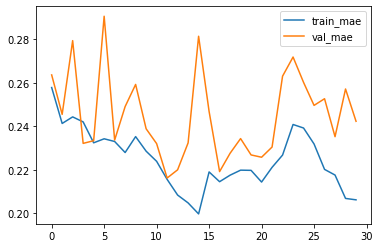

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

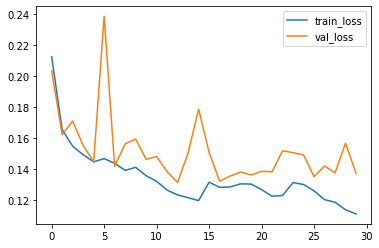

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

그래프가 고르지 못한 모습을 보여주지만 loss의 절댓값은 감소함

테스트 케이스 예측

In [ ]:
val_x_1 = np.expand_dims(x_val[0], axis = 0)

In [ ]:
result = model_2nd.predict(val_x_1)

1/1 [==============================] - 2s 2s/step


In [ ]:
np.set_printoptions(precision=6, suppress=True)

In [ ]:
result = result * 100
print(result)

[[14.185386 83.814384 92.59224   3.289433 60.848827 27.835283]]


In [ ]:
print(y_val[0])

[0 1 1 0 0 0]


두번째 테스트 케이스

In [ ]:
val_x_2 = np.expand_dims(x_val[1], axis = 0)

In [ ]:
result2 = model_2nd.predict(val_x_2)

1/1 [==============================] - 1s 644ms/step


In [ ]:
result2 = result2 * 100
print(result2)

[[ 9.422032 86.1057   42.137787  2.100975 41.875244 27.736404]]


In [ ]:
print(y_val[1])

[0 1 0 0 0 1]


## 4. Meta 데이터 분석

In [ ]:
!mkdir /content/drive/MyDrive/04_Scalp/Meta/meta_data # zip 파일 저장할 디렉토리

%cd /content/drive/MyDrive/04_Scalp/Meta/meta_data 
!unzip -qq '/content/drive/MyDrive/04_Scalp/Meta/META_DATA.zip'

/content/drive/MyDrive/04_Scalp/Meta/meta_data


In [ ]:
import glob 

meta_path = '/content/drive/MyDrive/04_Scalp/Meta/meta_data'
meta_path_list = glob.glob(meta_path+'/*')

In [ ]:
with open('/content/drive/MyDrive/04_Scalp/Meta/meta_data_list/meta_data_list.txt','w') as f:
    for path in meta_path_list:
        f.write(path)

NotADirectoryError: ignored

In [ ]:
print(len(meta_path_list))

101027


메타데이터 전부를 이용하기엔 너무 json파일이 많아서 추후에 일부만 이용해서 분석하기

## 5. 라벨링 데이터 분석 

각 증상간에 연관성이 있는지 시각화를 통해 파악해보기

+ json 파일을 정리해서 dataframe으로 만들고 .csv로 저장하기

#### 라벨링 데이터 압축 해제해서 구글 드라이브에 저장

In [ ]:
# 압축해제한 파일 저장할 디렉토리

!mkdir /content/drive/MyDrive/04_Scalp/label_data

In [ ]:
# 압축 해제해서 디렉토리에 저장

import glob 
import zipfile 

path = '/content/drive/MyDrive/04_Scalp/label_zip'
path_list = glob.glob(path+'/*')

In [ ]:
print(path_list)

['/content/drive/MyDrive/04_Scalp/label_zip/[라벨]피지과다_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]비듬_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]탈모_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]탈모_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]비듬_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]피지과다_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_0.양호.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]미세각질_3.중증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭홍반농포_2.중등도.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_1.경증.zip', '/content/drive/MyDrive/04_Scalp/label_zip/[라벨]모낭사이홍반_2.중등도.zip', 

In [ ]:
for json_path in path_list:
  json_zip = zipfile.ZipFile(json_path)
  json_zip.extractall('/content/drive/MyDrive/04_Scalp/label_data')
  json_zip.close()

In [2]:
# json 파일 총 23568개 : 이미지랑 개수 동일

import os

json_list = os.listdir('/content/drive/MyDrive/04_Scalp/label_data')
print(len(json_list))

23568


In [3]:
json_list.sort()

In [4]:
print(json_list[:10])

['0013_A2LEBJJDE00060O_1605839548962_2_TH.json', '0013_A2LEBJJDE00060O_1605943763600_3_TH.json', '0013_A2LEBJJDE00060O_1605943787774_2_TH.json', '0013_A2LEBJJDE00060O_1605943787774_6_BH.json', '0013_A2LEBJJDE00060O_1605949144786_2_TH.json', '0013_A2LEBJJDE00060O_1605949144786_6_BH.json', '0013_A2LEBJJDE00060O_1605949385518_2_TH.json', '0013_A2LEBJJDE00060O_1605949385518_6_BH.json', '0013_A2LEBJJDE00060O_1606386139601_2_TH.json', '0013_A2LEBJJDE00060O_1606386139601_3_TH.json']


#### 고유한 개인 6580명의 json 파일 한개씩 추출하기

In [5]:
json_id_list = []

def get_person_id_from_json_name (file_name):
  id = file_name[:-9]
  json_id_list.append(id)

In [6]:
for json_name in json_list:
  get_person_id_from_json_name(json_name)

In [7]:
json_id_set_list = list(set(json_id_list))

In [8]:
json_id_list.sort()

In [9]:
print(len(json_id_set_list))

6580


In [10]:
print(json_id_set_list[0])

1983_A2LEBJJDE00188L_1606101624272_


In [11]:
count = 0

find_two_json = json_id_set_list.copy()
two_exist = []

for json_id in json_id_set_list:
  name = json_id + '2_TH.json'
  if name in json_list:
    two_exist.append(name)
    find_two_json.remove(json_id)
  else:
    count += 1

In [12]:
print(count)

1986


In [13]:
print(len(two_exist))

4594


In [14]:
print(two_exist[:10])

#two_exist: 고유한 개인의 json file 이름 4594개

['1983_A2LEBJJDE00188L_1606101624272_2_TH.json', '5030_A2LEBJJDE00186Z_1606741919782_2_TH.json', '2278_A2LEBJJDE00181Z_1606655493812_2_TH.json', '3006_A1LCAIHDH00007C_1607734923139_2_TH.json', '1407_A2LEBJJDE001258_1606010279749_2_TH.json', '0715_A2LEBJJDE00175D_1607492696385_2_TH.json', '3755_A2LEBJJDE001857_1608270306332_2_TH.json', '4307_A2LEBJJDE000683_1606654074411_2_TH.json', '3588_A2LEBJJDE00108Y_1606299468176_2_TH.json', '8896_A2LEBJJDE001807_1606552907745_2_TH.json']


In [15]:
print(len(find_two_json))

1986


In [16]:
count = 0

find_three_json = find_two_json.copy()

three_exist = []

for json_id in find_two_json:
  name = json_id + '3_TH.json'
  if name in json_list:
    three_exist.append(name)
    find_three_json.remove(json_id)
  else:
    count += 1

In [17]:
print(count)

1117


In [18]:
print(len(three_exist))

869


In [19]:
print(three_exist[:10])

# three_exist : 고유한 개인의 json file 이름 869개

['9578_A2LEBJJDE00105K_1607140196981_3_TH.json', '4263_A2LEBJJDE00062A_1606727419143_3_TH.json', '4659_A2LEBJJDE001349_1606543066104_3_TH.json', '3365_A2LEBJJDE00106D_1608451277171_3_TH.json', '3977_A2LEBJJDE00039E_1606216678914_3_TH.json', '3006_A1LCAIHDH00007C_1608288755514_3_TH.json', '7978_A2LEBJJDE00071B_1606645660128_3_TH.json', '5030_A2LEBJJDE00186Z_1606740234227_3_TH.json', '3006_A1LCAIHDH00007C_1608347770229_3_TH.json', '1071_A2LEBJJDE00173R_1606092929643_3_TH.json']


In [20]:
count = 0

find_four_json = find_three_json.copy()

four_exist = []

for json_id in find_three_json:
  name = json_id + '4_LH.json'
  if name in json_list:
    four_exist.append(name)
    find_four_json.remove(json_id)
  else:
    count += 1

In [21]:
print(len(four_exist))

605


In [22]:
print(four_exist[:10])

# four_exist: 고유한 개인의 json file 이름 605개

['7851_A2LEBJJDE00074P_1606644286832_4_LH.json', '2800_A2LEBJJDE00036Z_1606026521501_4_LH.json', '7985_A1LCAIHDH00011D_1608870971726_4_LH.json', '9578_A2LEBJJDE00105K_1606895413847_4_LH.json', '1983_A2LEBJJDE00188L_1606102178916_4_LH.json', '3269_A2LEBJJDE00096Y_1609202973643_4_LH.json', '0616_A2LEBJJDE00004W_1606022103886_4_LH.json', '7851_A2LEBJJDE00074P_1607511067979_4_LH.json', '9643_A2LEBJJDE00061H_1606642645300_4_LH.json', '2326_A2LEBJJDE001998_1608257019997_4_LH.json']


In [23]:
print(len(find_four_json))

512


In [24]:
count = 0

find_five_json = find_four_json.copy()

five_exist = []

for json_id in find_four_json:
  name = json_id + '5_RH.json'
  if name in json_list:
    five_exist.append(name)
    find_five_json.remove(json_id)
  else:
    count += 1

In [25]:
print(len(five_exist))

# five_exist: 고유한 개인의 json file 이름 302개

302


In [26]:
print(five_exist[:10])

['1743_A2LEBJJDE00031Z_1605924026719_5_RH.json', '2032_A2LEBJJDE00152B_1606625588428_5_RH.json', '7978_A2LEBJJDE00071B_1606818862603_5_RH.json', '9244_A2LEBJJDE00154W_1606130940567_5_RH.json', '7985_A1LCAIHDH00011D_1607755664841_5_RH.json', '0643_A2LEBJJDE00048F_1606098162727_5_RH.json', '4370_A1LCAIHDH00005Q_1607827717573_5_RH.json', '1983_A2LEBJJDE00188L_1606101656995_5_RH.json', '2800_A2LEBJJDE00036Z_1606029559599_5_RH.json', '4810_A2LEBJJDE00177Y_1606091452364_5_RH.json']


In [27]:
count = 0

find_six_json = find_five_json.copy()

six_exist = []

for json_id in find_five_json:
  name = json_id + '6_BH.json'
  if name in json_list:
    six_exist.append(name)
    find_six_json.remove(json_id)
  else:
    count += 1

In [28]:
print(len(find_six_json))

0


In [29]:
print(len(six_exist))

# six_exist: 고유한 개인의 json file 이름 210개

210


In [30]:
# two_exist: 고유한 개인의 json file 이름 4594개
# three_exist : 고유한 개인의 json file 이름 869개
# four_exist: 고유한 개인의 json file 이름 605개
# five_exist: 고유한 개인의 json file 이름 302개
# six_exist: 고유한 개인의 json file 이름 210개
# 총 6580개 

In [31]:
print(two_exist)

['1983_A2LEBJJDE00188L_1606101624272_2_TH.json', '5030_A2LEBJJDE00186Z_1606741919782_2_TH.json', '2278_A2LEBJJDE00181Z_1606655493812_2_TH.json', '3006_A1LCAIHDH00007C_1607734923139_2_TH.json', '1407_A2LEBJJDE001258_1606010279749_2_TH.json', '0715_A2LEBJJDE00175D_1607492696385_2_TH.json', '3755_A2LEBJJDE001857_1608270306332_2_TH.json', '4307_A2LEBJJDE000683_1606654074411_2_TH.json', '3588_A2LEBJJDE00108Y_1606299468176_2_TH.json', '8896_A2LEBJJDE001807_1606552907745_2_TH.json', '6570_A2LEBJJDE001675_1607498847322_2_TH.json', '5438_A2LEBJJDE00159W_1606267559507_2_TH.json', '0663_A2LEBJJDE001716_1606534642598_2_TH.json', '9578_A2LEBJJDE00105K_1606385220042_2_TH.json', '9527_A2LEBJJDE00110E_1606530714659_2_TH.json', '9202_A2LEBJJDE00082X_1606647609850_2_TH.json', '9527_A2LEBJJDE00110E_1607750342185_2_TH.json', '5569_A2LEBJJDE001211_1606719506890_2_TH.json', '9905_A2LEBJJDE00042M_1607835511883_2_TH.json', '0663_A2LEBJJDE001716_1606790518260_2_TH.json', '6570_A2LEBJJDE001675_1607405255561_2_T

In [32]:
print(three_exist)

['9578_A2LEBJJDE00105K_1607140196981_3_TH.json', '4263_A2LEBJJDE00062A_1606727419143_3_TH.json', '4659_A2LEBJJDE001349_1606543066104_3_TH.json', '3365_A2LEBJJDE00106D_1608451277171_3_TH.json', '3977_A2LEBJJDE00039E_1606216678914_3_TH.json', '3006_A1LCAIHDH00007C_1608288755514_3_TH.json', '7978_A2LEBJJDE00071B_1606645660128_3_TH.json', '5030_A2LEBJJDE00186Z_1606740234227_3_TH.json', '3006_A1LCAIHDH00007C_1608347770229_3_TH.json', '1071_A2LEBJJDE00173R_1606092929643_3_TH.json', '7670_A1LCAIHDH000126_1608349502194_3_TH.json', '2327_A2LEBJJDE00091Y_1608695973942_3_TH.json', '7027_A2LEBJJDE001117_1603949553519_3_TH.json', '4478_A2LEBJJDE00052G_1606464444831_3_TH.json', '5438_A2LEBJJDE00159W_1606266742403_3_TH.json', '2032_A2LEBJJDE00152B_1606029639264_3_TH.json', '4133_A1LCAIHDH000035_1608178516946_3_TH.json', '7978_A2LEBJJDE00071B_1606820299331_3_TH.json', '7978_A2LEBJJDE00071B_1606820191107_3_TH.json', '9874_A2LEBJJDE00123M_1606990113198_3_TH.json', '9316_A2LEBJJDE00034E_1606037470317_3_T

In [33]:
print(four_exist)

['7851_A2LEBJJDE00074P_1606644286832_4_LH.json', '2800_A2LEBJJDE00036Z_1606026521501_4_LH.json', '7985_A1LCAIHDH00011D_1608870971726_4_LH.json', '9578_A2LEBJJDE00105K_1606895413847_4_LH.json', '1983_A2LEBJJDE00188L_1606102178916_4_LH.json', '3269_A2LEBJJDE00096Y_1609202973643_4_LH.json', '0616_A2LEBJJDE00004W_1606022103886_4_LH.json', '7851_A2LEBJJDE00074P_1607511067979_4_LH.json', '9643_A2LEBJJDE00061H_1606642645300_4_LH.json', '2326_A2LEBJJDE001998_1608257019997_4_LH.json', '0663_A2LEBJJDE001716_1606037148986_4_LH.json', '5438_A2LEBJJDE00159W_1606265850935_4_LH.json', '1981_A2LEBJJDE001493_1606523314375_4_LH.json', '5619_A2LEBJJDE00002B_1606111210372_4_LH.json', '1145_A2LEBJJDE00119L_1605952067012_4_LH.json', '1407_A2LEBJJDE001258_1606127471018_4_LH.json', '4970_A1LCAIHDH00010K_1608438976113_4_LH.json', '7366_A2LEBJJDE00143A_1606461425255_4_LH.json', '3006_A1LCAIHDH00007C_1608008840112_4_LH.json', '1237_A2LEBJJDE001584_1606114416561_4_LH.json', '6825_A1LCAIHDH00018Y_1608961957974_4_L

In [34]:
print(five_exist)

['1743_A2LEBJJDE00031Z_1605924026719_5_RH.json', '2032_A2LEBJJDE00152B_1606625588428_5_RH.json', '7978_A2LEBJJDE00071B_1606818862603_5_RH.json', '9244_A2LEBJJDE00154W_1606130940567_5_RH.json', '7985_A1LCAIHDH00011D_1607755664841_5_RH.json', '0643_A2LEBJJDE00048F_1606098162727_5_RH.json', '4370_A1LCAIHDH00005Q_1607827717573_5_RH.json', '1983_A2LEBJJDE00188L_1606101656995_5_RH.json', '2800_A2LEBJJDE00036Z_1606029559599_5_RH.json', '4810_A2LEBJJDE00177Y_1606091452364_5_RH.json', '4370_A1LCAIHDH00005Q_1608705089956_5_RH.json', '6078_A2LEBJJDE00160J_1606098497910_5_RH.json', '8212_A2LEBJJDE00070I_1606021239086_5_RH.json', '9202_A2LEBJJDE00082X_1605970096097_5_RH.json', '7698_A2LEBJJDE00165J_1606215778960_5_RH.json', '4919_A2LEBJJDE00064V_1605852069241_5_RH.json', '4232_A2LEBJJDE00146O_1606371281912_5_RH.json', '9578_A2LEBJJDE00105K_1606018185469_5_RH.json', '1237_A2LEBJJDE001584_1606115018982_5_RH.json', '8833_A2LEBJJDE00156I_1605965108300_5_RH.json', '9202_A2LEBJJDE00082X_1606383716857_5_R

In [35]:
print(six_exist)

['7701_A1LCAIHDH000085_1610012542855_6_BH.json', '3263_A1LCAIHDH00014R_1608777751162_6_BH.json', '1237_A2LEBJJDE001584_1606114225119_6_BH.json', '7418_A2LEBJJDE000724_1605849920306_6_BH.json', '3006_A1LCAIHDH00007C_1608363958408_6_BH.json', '7168_A2LEBJJDE00124F_1606011323127_6_BH.json', '8366_A2LEBJJDE00196T_1606015457272_6_BH.json', '5644_A2LEBJJDE00198F_1606015609281_6_BH.json', '1237_A2LEBJJDE001584_1606115252601_6_BH.json', '7985_A1LCAIHDH00011D_1607860223894_6_BH.json', '5009_A1LCAIHDH00020E_1608948532591_6_BH.json', '1743_A2LEBJJDE00031Z_1605865759604_6_BH.json', '1069_A2LEBJJDE00094D_1609046771495_6_BH.json', '8814_A2LEBJJDE00118S_1604731540243_6_BH.json', '3269_A2LEBJJDE00096Y_1609136118976_6_BH.json', '1534_A2LEBJJDE00133G_1607072983774_6_BH.json', '7988_A2LEBJJDE000357_1606032269856_6_BH.json', '7978_A2LEBJJDE00071B_1606729735664_6_BH.json', '0770_A2LEBJJDE000865_1608807120890_6_BH.json', '7670_A1LCAIHDH000126_1609128609718_6_BH.json', '1237_A2LEBJJDE001584_1606115236401_6_B

In [36]:
total_json = []

In [37]:
for json_list in [two_exist, three_exist, four_exist, five_exist, six_exist]:
  for name in json_list:
    total_json.append(name)

In [38]:
print(len(total_json))

# total_json: unique 한 개인의 json 이름

6580


In [40]:
total_json.sort()

In [41]:
total_json[:10]

['0013_A2LEBJJDE00060O_1605839548962_2_TH.json',
 '0013_A2LEBJJDE00060O_1605943763600_3_TH.json',
 '0013_A2LEBJJDE00060O_1605943787774_2_TH.json',
 '0013_A2LEBJJDE00060O_1605949144786_2_TH.json',
 '0013_A2LEBJJDE00060O_1605949385518_2_TH.json',
 '0013_A2LEBJJDE00060O_1606386139601_2_TH.json',
 '0013_A2LEBJJDE00060O_1606386153203_2_TH.json',
 '0013_A2LEBJJDE00060O_1606386172558_2_TH.json',
 '0013_A2LEBJJDE00060O_1606386195243_2_TH.json',
 '0013_A2LEBJJDE00060O_1606386237060_2_TH.json']

In [43]:
print(total_json)

['0013_A2LEBJJDE00060O_1605839548962_2_TH.json', '0013_A2LEBJJDE00060O_1605943763600_3_TH.json', '0013_A2LEBJJDE00060O_1605943787774_2_TH.json', '0013_A2LEBJJDE00060O_1605949144786_2_TH.json', '0013_A2LEBJJDE00060O_1605949385518_2_TH.json', '0013_A2LEBJJDE00060O_1606386139601_2_TH.json', '0013_A2LEBJJDE00060O_1606386153203_2_TH.json', '0013_A2LEBJJDE00060O_1606386172558_2_TH.json', '0013_A2LEBJJDE00060O_1606386195243_2_TH.json', '0013_A2LEBJJDE00060O_1606386237060_2_TH.json', '0013_A2LEBJJDE00060O_1606386248930_2_TH.json', '0013_A2LEBJJDE00060O_1606386266117_2_TH.json', '0013_A2LEBJJDE00060O_1606386383334_2_TH.json', '0013_A2LEBJJDE00060O_1606386400774_2_TH.json', '0013_A2LEBJJDE00060O_1606386412941_3_TH.json', '0013_A2LEBJJDE00060O_1606386426925_2_TH.json', '0013_A2LEBJJDE00060O_1606386451791_2_TH.json', '0013_A2LEBJJDE00060O_1606386463037_2_TH.json', '0013_A2LEBJJDE00060O_1606386474090_2_TH.json', '0013_A2LEBJJDE00060O_1606386486884_2_TH.json', '0013_A2LEBJJDE00060O_1606386499230_2_T

In [44]:
txt_path = '/content/drive/MyDrive/04_Scalp/json_list.txt'

with open(txt_path,'w') as f:
    for name in total_json:
        f.write(name+'\n')


In [11]:
f = open('/content/drive/MyDrive/04_Scalp/json_list.txt','r')
lines = f.readlines()
f.close()

In [12]:
json_list = []

for line in lines:
  line = line.strip()
  json_list.append(line)

In [13]:
print(json_list[:10])

['0013_A2LEBJJDE00060O_1605839548962_2_TH.json', '0013_A2LEBJJDE00060O_1605943763600_3_TH.json', '0013_A2LEBJJDE00060O_1605943787774_2_TH.json', '0013_A2LEBJJDE00060O_1605949144786_2_TH.json', '0013_A2LEBJJDE00060O_1605949385518_2_TH.json', '0013_A2LEBJJDE00060O_1606386139601_2_TH.json', '0013_A2LEBJJDE00060O_1606386153203_2_TH.json', '0013_A2LEBJJDE00060O_1606386172558_2_TH.json', '0013_A2LEBJJDE00060O_1606386195243_2_TH.json', '0013_A2LEBJJDE00060O_1606386237060_2_TH.json']


In [14]:
print(len(json_list))

6580


In [15]:
total_json = json_list

json_list.txt 파일에는 고유한 개인의 json 파일 이름이 저장되어있음

필요할 때마다 불러와서 사용

#### 데이터 프레임 형성하기

In [16]:
import json
import pandas as pd

data_list = []
base_path = '/content/drive/MyDrive/04_Scalp/label_data'
for path in total_json:
  single_list = []
  json_path = base_path + '/'+ path
  with open(json_path, 'r') as file:
    data = json.load(file)
    single_list.append(data['image_id'])
    single_list.append(data['value_1'])
    single_list.append(data['value_2'])
    single_list.append(data['value_3'])
    single_list.append(data['value_4'])
    single_list.append(data['value_5'])
    single_list.append(data['value_6'])
  data_list.append(single_list)

KeyboardInterrupt: ignored

In [54]:
print(data_list)

[['0013_A2LEBJJDE00060O_1605839548962_2', '0', '2', '0', '1', '0', '2']]


In [55]:
df = pd.DataFrame(data_list, columns = ['ID','미세각질','피지과다','모낭사이홍반','모낭홍반/농포','비듬','탈모'])

In [56]:
df.columns

Index(['ID', '미세각질', '피지과다', '모낭사이홍반', '모낭홍반/농포', '비듬', '탈모'], dtype='object')

In [57]:
columns = df.columns[1:]

for col in columns:
  df[col] = pd.to_numeric(df[col])

In [58]:
df

,ID,미세각질,피지과다,모낭사이홍반,모낭홍반/농포,비듬,탈모
0,0013_A2LEBJJDE00060O_1605839548962_2,0,2,0,1,0,2


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       1 non-null      object
 1   미세각질     1 non-null      int64 
 2   피지과다     1 non-null      int64 
 3   모낭사이홍반   1 non-null      int64 
 4   모낭홍반/농포  1 non-null      int64 
 5   비듬       1 non-null      int64 
 6   탈모       1 non-null      int64 
dtypes: int64(6), object(1)
memory usage: 184.0+ bytes
